In [1]:
from IPython.display import display, HTML

display(HTML('<style>.output_scroll { height: 400px; overflow-y: scroll; }</style>'))

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings("ignore")

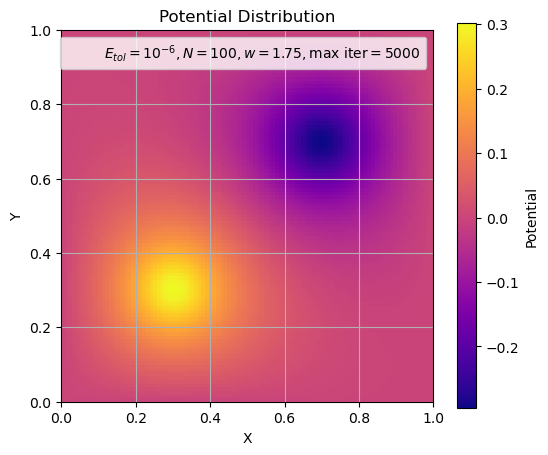

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.05): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE(Etol=10**-6,N=100,w=1.75,max_iter=5000): #Œ≤ŒµŒªœÑŒπœÉœÑŒµœÇ œÄŒ±œÅŒ±ŒºŒµœÑœÅŒøŒπ Œù=100,ŒïœÑŒøŒª=10^-10
                                                   #ŒºŒ±œá_ŒπœÑŒµœÅ=5000,œâ=1.2-1.4
    sfalma=1
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #Œ±œÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # Œ∑ range ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒµŒπ ŒºŒøŒΩŒø ŒºŒµ Œ±Œ∫ŒµœÅŒ±ŒπŒµœÇ œÑŒπŒºŒµœÇ
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    X,Y=np.meshgrid(x,y)
    
    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.7, 0.7)
    S = G1 - G2
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<max_iter:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                )

        E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
        E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
        Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)

        sfalma=np.abs(Etmp-E)
        E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi

    return (pfilist, E, ite)

diagdata=convE()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(diagdata[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])

#plt.imshow(diagdata[0].T,cmap='plasma', origin = 'lower', extent = [0, 1, 0, 1])
plt.colorbar(im, label="Potential")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Potential Distribution")
dummy_plot = ax.plot([], [], ' ', label=r"$E_{tol}=10^{-6}, N=100, w=1.75, \mathrm{max\ iter}=5000$")
ax.legend(loc="upper right")

plt.grid(True)
plt.show()



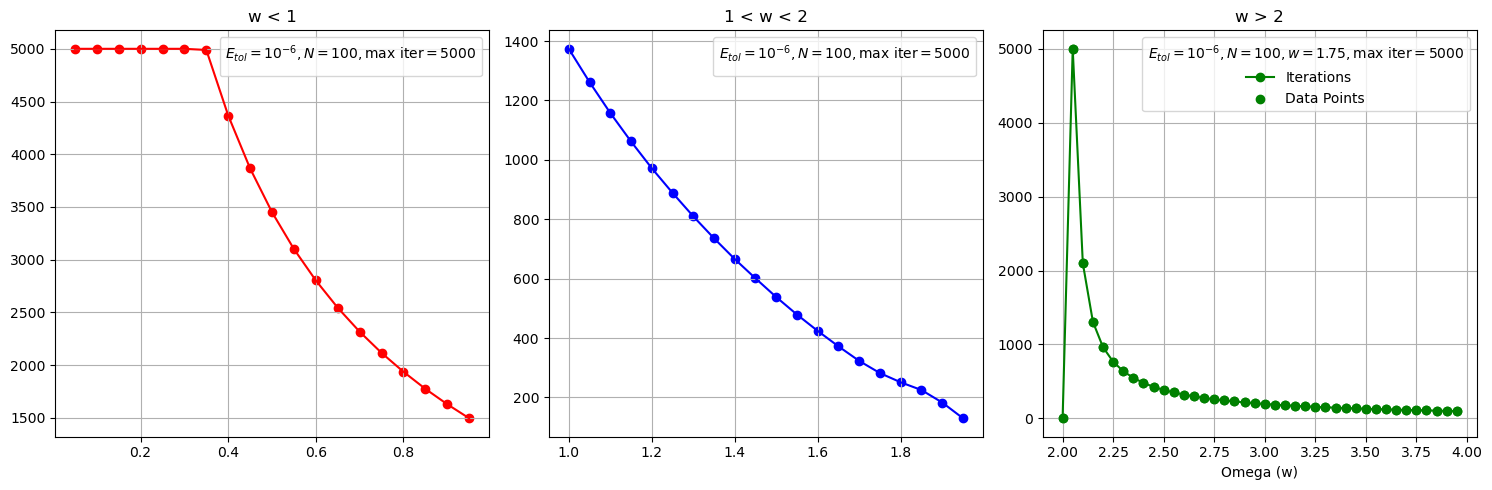

In [92]:
#now i wanna try different omegas and see convergence (iterations)

w1list=[]

iterlist1=[]
energylist1=[]

w2list=[]
w3list=[]

iterlist2=[]
energylist2=[]

iterlist3=[]
energylist3=[]

#af=apotelesma function

for w1 in np.arange(0.05, 1.00, 0.05):  # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒπŒºœéŒΩ Œ±œÄœå 1.0 Œ≠œâœÇ 2.0
    af1 = convE(w=w1,Etol=10**-6,N=100,max_iter=5000)  # ŒöŒªŒÆœÉŒ∑ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ synartisi
    w1list.append(w1)  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒøœÖ omega œÉœÑŒ∑ ŒªŒØœÉœÑŒ±
    iterlist1.append(af1[2])  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒøœÖ œÄœÅœéœÑŒøœÖ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒøœÇ
    energylist1.append(af1[1]) 

for w2 in np.arange(1.00, 2.00, 0.05):  # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒπŒºœéŒΩ Œ±œÄœå 1.0 Œ≠œâœÇ 2.0
    af2 = convE(w=w2,Etol=10**-6,N=100,max_iter=5000)  # ŒöŒªŒÆœÉŒ∑ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ synartisi
    w2list.append(w2)  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒøœÖ omega œÉœÑŒ∑ ŒªŒØœÉœÑŒ±
    iterlist2.append(af2[2])  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒøœÖ œÄœÅœéœÑŒøœÖ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒøœÇ
    energylist2.append(af2[1])

for w3 in np.arange(2.00, 4.00, 0.05):  # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒπŒºœéŒΩ Œ±œÄœå 1.0 Œ≠œâœÇ 2.0
    af3 = convE(w=w3,Etol=10**-6,N=100,max_iter=5000)  # ŒöŒªŒÆœÉŒ∑ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ synartisi
    w3list.append(w3)  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒøœÖ omega œÉœÑŒ∑ ŒªŒØœÉœÑŒ±
    iterlist3.append(af3[2])  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒøœÖ œÄœÅœéœÑŒøœÖ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒøbœÇ
    energylist3.append(af3[1]) 


fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 Œ≥œÅŒ±ŒºŒºŒÆ, 3 œÉœÑŒÆŒªŒµœÇ
axes[0].plot(w1list,iterlist1, color='r')
axes[0].scatter(w1list, iterlist1, color='r')

axes[0].set_title("w < 1")
axes[0].grid(True)
axes[0].legend(title=r"$E_{tol}=10^{-6}, N=100, \mathrm{max\ iter}=5000$")



# ŒîŒµœçœÑŒµœÅŒø plot
axes[1].plot(w2list,iterlist2, color='b')
axes[1].scatter(w2list, iterlist2, color='b')

axes[1].set_title("1 < w < 2")
axes[1].grid(True)
axes[1].legend(title=r"$E_{tol}=10^{-6}, N=100, \mathrm{max\ iter}=5000$")

axes[2].plot(w3list, iterlist3, color='g', linestyle='-', marker='o')
axes[2].scatter(w3list, iterlist3, color='g')
axes[2].set_title("w > 2")
axes[2].set_xlabel("Omega (w)")
axes[2].grid(True)
axes[2].legend(title=r"$E_{tol}=10^{-6}, N=100, w=1.75, \mathrm{max\ iter}=5000$")

# Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ Œ∫ŒµŒΩœéŒΩ ŒºŒµœÑŒ±Œæœç œÑœâŒΩ plots
plt.tight_layout()

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑
plt.show()


#anamenomeni sumperifora sto omega=2
#prepei na to kanw kai gia mikroteres times tou omega!!!
#to kanw sto telos giati tha parei pollh wra na treksei

In [7]:
'''Keep the size of the rectangular cell fixed and increase the mesh size (e.g.,
ùëÅùë• = ùëÅùë¶ = 10, 100, 1000, etc. How does this affect the calculated energy
[see Eq. (7)].'''

'Keep the size of the rectangular cell fixed and increase the mesh size (e.g.,\nùëÅùë• = ùëÅùë¶ = 10, 100, 1000, etc. How does this affect the calculated energy\n[see Eq. (7)].'

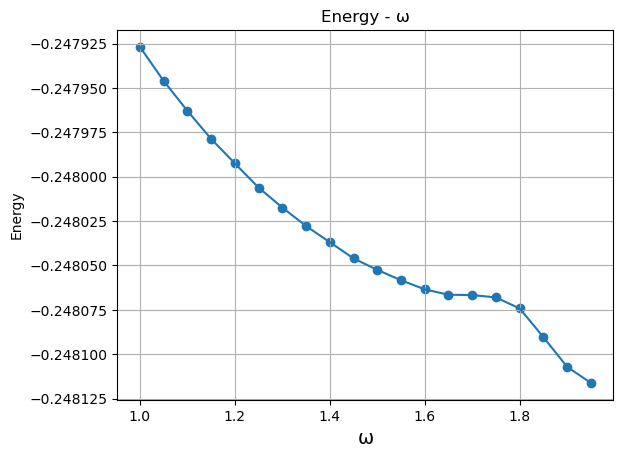

In [83]:
#energy-omega


plt.plot(w2list,energylist2)
plt.scatter(w2list,energylist2)
plt.xlabel("œâ",size=14)
plt.ylabel("Energy")
plt.title("Energy - œâ")
plt.grid()
plt.show()

In [84]:
print(energylist2) 

[-0.2479269008090253, -0.24794605768832934, -0.24796291600582704, -0.24797871623799053, -0.24799250353722652, -0.24800613886701656, -0.2480173679209377, -0.24802778201597542, -0.2480368747320466, -0.24804600724838807, -0.24805246146185178, -0.24805830909773177, -0.24806344151961846, -0.24806647453096248, -0.2480666457898421, -0.24806799312096112, -0.2480741835751662, -0.24809035669638124, -0.2481070863503926, -0.24811613480602807]


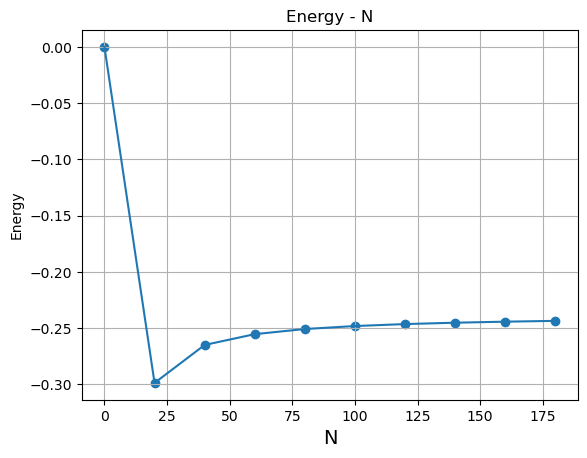

In [85]:
Nlist=[]
energylist=[]
#af=apotelesma function

for n in np.arange(0, 200, 20):  # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒπŒºœéŒΩ Œ±œÄœå 1.0 Œ≠œâœÇ 2.0
    af = convE(N=n)  # ŒöŒªŒÆœÉŒ∑ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ synartisi
    Nlist.append(n)  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒøœÖ omega œÉœÑŒ∑ ŒªŒØœÉœÑŒ±
    energylist.append(af[1]) 




plt.plot(Nlist,energylist)
plt.scatter(Nlist,energylist)
plt.xlabel("N",size=14)
plt.ylabel("Energy")
plt.title("Energy - N")
plt.grid()
plt.show()

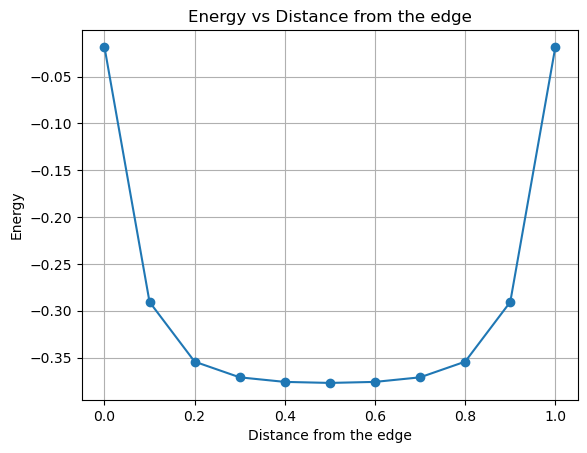

In [11]:
xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.02): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE2(Etol=10**-6,N=100,w=1.75,max_iter=5000): #Œ≤ŒµŒªœÑŒπœÉœÑŒµœÇ œÄŒ±œÅŒ±ŒºŒµœÑœÅŒøŒπ Œù=100,ŒïœÑŒøŒª=10^-10
                                                   #ŒºŒ±œá_ŒπœÑŒµœÅ=5000,œâ=1.2-1.4
    sfalma=1
    E=1 
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #Œ±œÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # Œ∑ range ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒµŒπ ŒºŒøŒΩŒø ŒºŒµ Œ±Œ∫ŒµœÅŒ±ŒπŒµœÇ œÑŒπŒºŒµœÇ
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    X,Y=np.meshgrid(x,y)
    Elista=[]    

    x_thesi=np.arange(0,1.1,0.1)
    for i in x_thesi:
        pfilist = np.zeros((N+1, N+1))  # Reset œÑŒø Œ¥œÖŒΩŒ±ŒºŒπŒ∫œå Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒΩŒ≠Œ± Œ∏Œ≠œÉŒ∑ œÜŒøœÅœÑŒØŒøœÖ CHAT GPT!

        G1 = g2D(X, Y, i, 0.2)
        G2 = g2D(X, Y, i, 0.6)
        S = G1 - G2
        
        pfilist[0,:]=0
        pfilist[N,:]=0
        pfilist[:,0]=0
        pfilist[:,N]=0
        
        sfalma = 1 #CHAT
        E = 0 #CHAT
        ite = 0 #CHAT
        
        while sfalma>Etol and ite<max_iter:
            ite+=1        
            for i in range(1,N):  #N-1 eixa prin
                for j in range(1,N):
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i + 1, j] + pfilist[i - 1, j] +
                        pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                    )
    
            E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
            E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
            Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)
    
            sfalma=np.abs(Etmp-E)
            E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi
        Elista.append(E)

    return (pfilist, E, Elista,x_thesi)

datamou=convE2()

plt.plot(datamou[3], datamou[2], marker='o')
plt.xlabel("Distance from the edge")
plt.ylabel("Energy")
plt.title("Energy vs Distance from the edge")
plt.grid()
plt.show() # Œ¥ŒµŒΩ ŒµŒπŒºŒ±Œπ Œ∫Œ±Œ∏ŒøŒªŒøœÖ œÉŒπŒ≥ŒøœÖœÅŒ∑ Œ±ŒΩ œÑŒ± ŒΩŒøœÖŒºŒµœÅŒ± Œ≥ŒπŒ± œÑŒ∑ŒΩ ŒµŒΩŒµœÅŒ≥ŒµŒπŒ± ŒµŒπŒΩŒ±Œπ œÑŒ± Œ±ŒΩŒ±ŒºŒµŒΩŒøŒºŒµŒΩŒ±

In [12]:
'''Create a Faraday cage in the cell. Is the calculated potential physically
meaningful?'''

'Create a Faraday cage in the cell. Is the calculated potential physically\nmeaningful?'

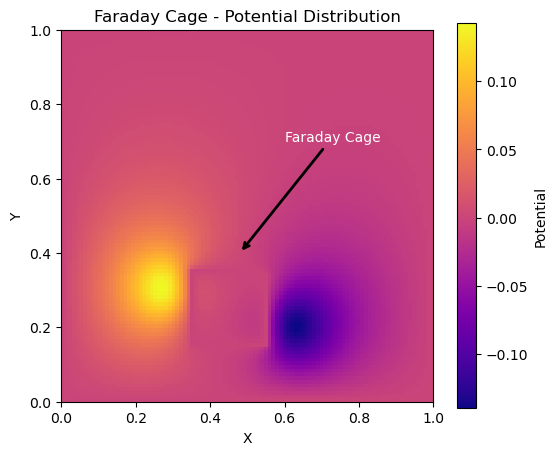

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def FaradayCage(Etol=10**-6, N=100, w=1.75, max_iter=5000):
    auxMat = np.ones((N+1, N+1))  # Œ§œéœÅŒ± ŒµŒØŒΩŒ±Œπ 2D
    auxMat[0, :] = 0
    auxMat[N, :] = 0
    auxMat[:, 0] = 0
    auxMat[:, N] = 0

    sfalma = 1
    ite = 0
    xmin, ymin = 0, 0
    xmax, ymax = 1, 1
    h = (xmax - xmin) / (N - 1)
    E = 0  # ŒëœÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    X, Y = np.meshgrid(x, y)

    # Œ¶ŒøœÅœÑŒØŒø ŒîŒπœÄœåŒªŒøœÖ
    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.2, 0.6)
    S = G1 - G2

    # ŒüœÅŒπœÉŒºœåœÇ œÉœÖŒΩœåœÅœâŒΩ (Œ∫ŒªŒøœÖŒ≤ŒØ Faraday)
    pfilist = np.zeros((N+1, N+1))
# ŒöŒ±Œ∏ŒøœÅŒπœÉŒºœåœÇ œÑœâŒΩ ŒøœÅŒØœâŒΩ œÑŒøœÖ Œ∫ŒªŒøœÖŒ≤ŒπŒøœç Faraday
    pfilist[30:41, 20] = 0  # ŒöŒ¨Œ∏ŒµœÑŒø œÑŒøŒØœáœâŒºŒ± Œ±œÅŒπœÉœÑŒµœÅŒ¨
    pfilist[30:41, 80] = 0  # ŒöŒ¨Œ∏ŒµœÑŒø œÑŒøŒØœáœâŒºŒ± Œ¥ŒµŒæŒπŒ¨
    pfilist[30, 20:80] = 0  # ŒüœÅŒπŒ∂œåŒΩœÑŒπŒø œÑŒøŒØœáœâŒºŒ± œÄŒ¨ŒΩœâ
    pfilist[40, 20:80] = 0 
    # ŒüœÅŒπŒ∂œåŒΩœÑŒπŒø œÑŒøŒØœáœâŒºŒ± Œ∫Œ¨œÑœâ
    auxMat[35:55, 15] = 0
    auxMat[35:55, 35] = 0
    auxMat[35, 15:35] = 0
    auxMat[55, 15:35] = 0


    
    while sfalma > Etol and ite < max_iter:
        ite += 1
                
        for i in range(1, N):  
            for j in range(1, N):
                if auxMat[i, j] != 0:  # ŒîŒπŒøœÅŒ∏œâŒºŒ≠ŒΩŒ∑ œÉœÖŒΩŒ∏ŒÆŒ∫Œ∑
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i + 1, j] + pfilist[i - 1, j] +
                        pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                    )

        # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(E - Etmp)
        E = Etmp

    return pfilist, E, ite


# ŒïŒ∫œÑŒµŒªŒµŒØœÇ œÑŒ∑ FaradayCage()
faraday_data = FaradayCage()
potential_grid = faraday_data[0]

# Œ£œáŒµŒ¥ŒØŒ±œÉŒ∑ œÑŒøœÖ imshow Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(potential_grid.T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(im, label="Potential")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Faraday Cage - Potential Distribution")

cage_x, cage_y = 0.48, 0.4  # Œ§ŒøœÄŒøŒ∏ŒµœÉŒØŒ± œÑŒøœÖ Œ∫ŒªŒøœÖŒ≤ŒπŒøœç Faraday

ax.annotate("Faraday Cage",  
            xy=(cage_x, cage_y),  # Œ£Œ∑ŒºŒµŒØŒø œÄŒøœÖ Œ∏Œ± Œ¥ŒµŒØœáŒΩŒµŒπ œÑŒø Œ≤Œ≠ŒªŒøœÇ
            xytext=(0.6, 0.7),  # Œ£Œ∑ŒºŒµŒØŒø œÄŒøœÖ Œ∏Œ± ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµœÑŒ±Œπ Œ∑ ŒµœÑŒπŒ∫Œ≠œÑŒ±
            arrowprops=dict(facecolor='white', edgecolor='black', arrowstyle='->', linewidth=2),
            fontsize=10, color='white')
plt.show()

'''can you create a capacitor?''' Œ£œÑŒøŒΩ Œ±œÅœáŒπŒ∫Œø ŒºŒøœÖ Œ∫œâŒ¥ŒπŒ∫Œ± Œ±ŒΩœÑŒπ Œ≥ŒπŒ± Œ¥œÖŒø œÉŒ∑ŒºŒµŒπŒ±Œ∫Œ± œÜŒøœÅœÑŒπŒ± (Œ¥ŒπœÄŒøŒªŒø) Œ∏Œ± Œµœáœâ Œ¥œÖŒø œÄŒ±œÅŒ±ŒªŒªŒ∑ŒªŒµœÇ œÄŒªŒ±Œ∫ŒµœÇ Œ±ŒΩœÑŒπŒ∏ŒµœÑŒøœÖ Œ¥œÖŒΩŒ±ŒºŒπŒ∫ŒøœÖ

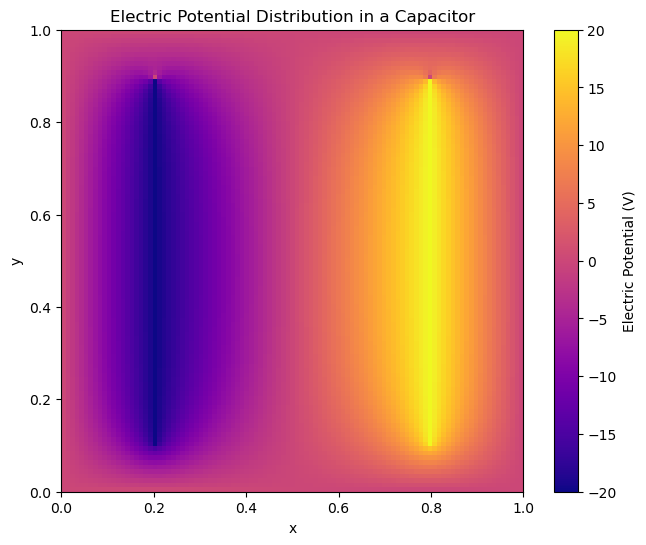

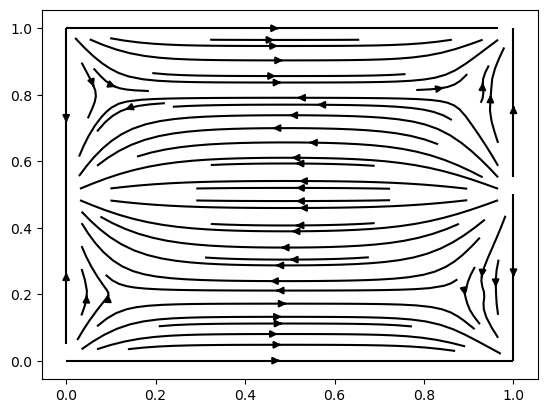

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ Œ∫Œ±Œπ œÑŒøœÖ œáœéœÅŒøœÖ
xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # Œ†ŒªŒ≠Œ≥ŒºŒ± 100x100
h = (xmax - xmin) / (N - 1)  # ŒíŒÆŒºŒ± œÑŒøœÖ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ


def convE_capacitor(Etol=1e-6, N=100, w=1.75, max_iter=5000):
    ite = 0
    h = (xmax - xmin) / (N - 1)  # ŒíŒÆŒºŒ± œÑŒøœÖ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ
    sfalma = 1  # ŒëœÅœáŒπŒ∫œå œÉœÜŒ¨ŒªŒºŒ± (Œ≥ŒπŒ± œÑŒ∑ŒΩ œÉœçŒ≥Œ∫ŒªŒπœÉŒ∑)
    E = 0  # ŒëœÅœáŒπŒ∫ŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±

    # ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ
    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    pfilist = np.zeros((N+1, N+1))  # Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ∑ŒªŒµŒ∫œÑœÅŒπŒ∫Œøœç Œ¥œÖŒΩŒ±ŒºŒπŒ∫Œøœç

    ################################################################################
    V0 = 20  # Œ§Œ¨œÉŒ∑ ŒºŒµœÑŒ±Œæœç œÑœâŒΩ œÄŒªŒ±Œ∫œéŒΩ
    plate_width = int(N * 0.8)  # Œ§Œø œÄŒªŒ¨œÑŒøœÇ œÑœâŒΩ œÄŒªŒ±Œ∫œéŒΩ ŒµŒØŒΩŒ±Œπ œÑŒø 80% œÑŒøœÖ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ

    # ŒöŒ±Œ∏ŒøœÅŒπœÉŒºœåœÇ Œ∏Œ≠œÉŒ∑œÇ œÑœâŒΩ œÄŒªŒ±Œ∫œéŒΩ
    top_plate_y = int(0.8 * N)  # ŒÜŒΩœâ œÄŒªŒ¨Œ∫Œ± œÉœÑŒ∑ Œ≥œÅŒ±ŒºŒºŒÆ 80 (Œ≥ŒπŒ± Œù=100)
    bottom_plate_y = int(0.2 * N)  # ŒöŒ¨œÑœâ œÄŒªŒ¨Œ∫Œ± œÉœÑŒ∑ Œ≥œÅŒ±ŒºŒºŒÆ 20 (Œ≥ŒπŒ± Œù=100)
    
    # Œ§ŒøœÄŒøŒ∏Œ≠œÑŒ∑œÉŒ∑ œÑœâŒΩ œÄŒªŒ±Œ∫œéŒΩ œÉœÑŒø œÄŒªŒ≠Œ≥ŒºŒ± ŒºŒµ œÉœÑŒ±Œ∏ŒµœÅœå Œ¥œÖŒΩŒ±ŒºŒπŒ∫œå
    start_x = (N - plate_width) // 2  # ŒëœÅœáŒÆ œÄŒªŒ¨Œ∫Œ±œÇ - // Œ±Œ∫ŒµœÅŒ±ŒπŒ± Œ¥ŒπŒ±ŒπœÅŒµœÉŒ∑
    end_x = (N + plate_width) // 2  # Œ§Œ≠ŒªŒøœÇ œÄŒªŒ¨Œ∫Œ±œÇ
    
    # ŒÜŒΩœâ œÄŒªŒ¨Œ∫Œ± (+V0)
    pfilist[top_plate_y, start_x:end_x] = V0
    
    # ŒöŒ¨œÑœâ œÄŒªŒ¨Œ∫Œ± (-V0)
    pfilist[bottom_plate_y, start_x:end_x] = -V0
    ##############################################################################
    
    while sfalma > Etol and ite < max_iter:
        ite += 1

        for i in range(1, N):
            for j in range(1, N):
                # ŒïŒæŒ±ŒπœÅŒøœçŒºŒµ œÑŒ± œÉŒ∑ŒºŒµŒØŒ± œÑœâŒΩ œÄŒªŒ±Œ∫œéŒΩ
                if not ((int(0.8*N) == i and (N - plate_width) // 2 <= j <= (N + plate_width) // 2) or
                        (int(0.2*N) == i and (N - plate_width) // 2 <= j <= (N + plate_width) // 2)):
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i+1, j] + pfilist[i-1, j] +
                        pfilist[i, j+1] + pfilist[i, j-1]
                    )
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :]) ** 2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1]) ** 2)
        Etmp = 0.5 * (E1 + E2)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑŒ∑œÇ ŒΩŒ≠Œ±œÇ œÑŒπŒºŒÆœÇ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ

    return pfilist, E, ite

potential, energy, iterations = convE_capacitor()

plt.figure(figsize=(8, 6))
plt.imshow(potential.T, cmap='plasma', origin='lower', extent=[xmin, xmax, ymin, ymax])
plt.colorbar(label="Electric Potential (V)")
plt.title("Electric Potential Distribution in a Capacitor")
plt.xlabel("x")
plt.ylabel("y")
plt.show() #as sxediasw kai to hlektrko pedio 

Ex, Ey = np.gradient(-potential, h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')




‚Ä¢ Implement Neumann and Periodic Boundary conditions. 


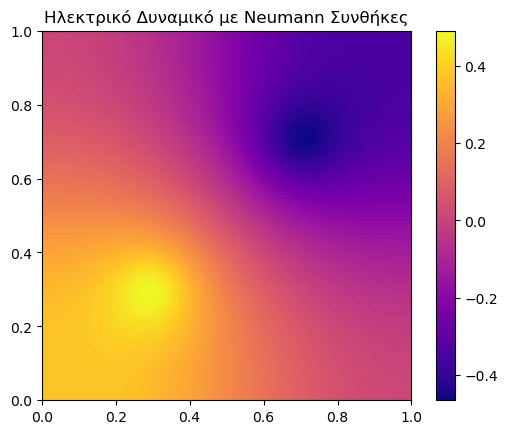

In [30]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # ŒúŒ≠Œ≥ŒµŒ∏ŒøœÇ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ

def g2D(x, y, qx, qy, sigma=0.05):
    """ ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ ŒºŒπŒ± Gaussian Œ∫Œ±œÑŒ±ŒΩŒøŒºŒÆ œÜŒøœÅœÑŒØŒøœÖ. """
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e)) / (2 * np.pi * sigma**2)

def convE_Neumann(Etol=1e-6, N=100, w=1.75, max_iter=5000):
    """ ŒïœÄŒπŒªœçŒµŒπ œÑŒ∑ŒΩ ŒµŒæŒØœÉœâœÉŒ∑ Poisson ŒºŒµ Neumann ŒøœÅŒπŒ±Œ∫Œ≠œÇ œÉœÖŒΩŒ∏ŒÆŒ∫ŒµœÇ. """
    sfalma = 1
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # ŒëœÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ

    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    pfilist = np.zeros((N+1, N+1))
    X, Y = np.meshgrid(x, y)

    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.7, 0.7)
    S = G1 - G2  # Œ£œÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒ∑Œ≥ŒÆœÇ

    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(1, N):  
            for j in range(1, N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i+1, j] + pfilist[i-1, j] +
                    pfilist[i, j+1] + pfilist[i, j-1] + h**2 * S[i, j]
                )

        # ** Neumann Boundary Conditions (Œ∫Œ¨Œ∏Œµ ŒµœÄŒ±ŒΩŒ¨ŒªŒ∑œàŒ∑) **
        pfilist[0, :] = pfilist[1, :]   # ŒöŒ¨œÑœâ œåœÅŒπŒø
        pfilist[N, :] = pfilist[N-1, :] # Œ†Œ¨ŒΩœâ œåœÅŒπŒø
        pfilist[:, 0] = pfilist[:, 1]   # ŒëœÅŒπœÉœÑŒµœÅœå œåœÅŒπŒø
        pfilist[:, N] = pfilist[:, N-1] # ŒîŒµŒæŒØ œåœÅŒπŒø

        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑŒ∑œÇ ŒΩŒ≠Œ±œÇ œÑŒπŒºŒÆœÇ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ

    return pfilist, E, ite

# ** ŒïŒ∫œÑŒ≠ŒªŒµœÉŒ∑ œÑŒ∑œÇ ŒµœÄŒØŒªœÖœÉŒ∑œÇ **
diagdata = convE_Neumann()

# ** ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œÑŒøœÖ Œ¥œÖŒΩŒ±ŒºŒπŒ∫Œøœç **
plt.imshow(diagdata[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.title("ŒóŒªŒµŒ∫œÑœÅŒπŒ∫œå ŒîœÖŒΩŒ±ŒºŒπŒ∫œå ŒºŒµ Neumann Œ£œÖŒΩŒ∏ŒÆŒ∫ŒµœÇ")
plt.show()


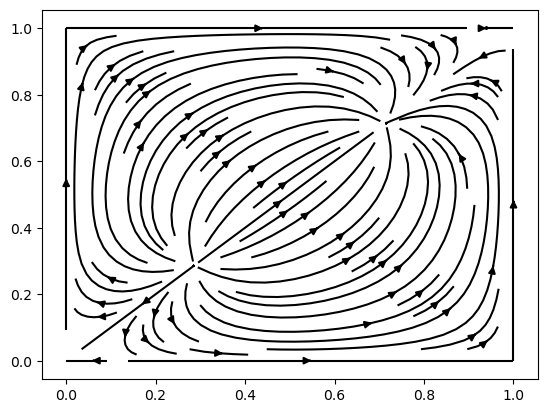

In [31]:

Ey, Ex = np.gradient(-diagdata[0], h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')

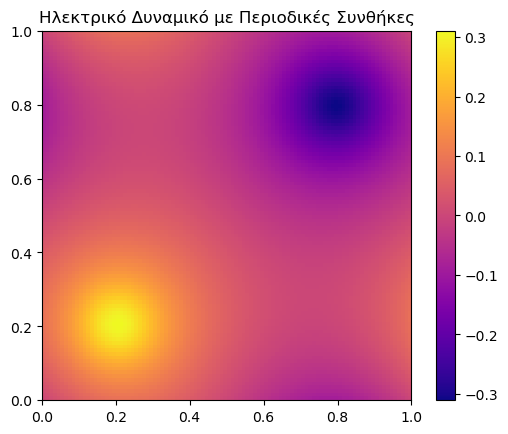

In [134]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # ŒúŒ≠Œ≥ŒµŒ∏ŒøœÇ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ

def per(i, N):
    if i < 0:
        return i + N
    elif i >= N:
        return i - N
    else:
        return i

def convE_periodic(Etol=1e-6, N=100, w=1.75, max_iter=10000):
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # ŒëœÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
    sfalma = 1

    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    pfilist = np.zeros((N, N))
    X, Y = np.meshgrid(x, y)

    G1 = g2D(X, Y, 0.2, 0.2)
    G2 = g2D(X, Y, 0.8, 0.8)
    S = G1 - G2  # Œ£œÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒ∑Œ≥ŒÆœÇ

    # ** ŒïœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫ŒÆ Œ¥ŒπŒ±Œ¥ŒπŒ∫Œ±œÉŒØŒ± Successive Over-Relaxation (SOR) **
    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(N):  
            for j in range(N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[per(i + 1, N), j] + pfilist[per(i - 1, N), j] +
                    pfilist[i, per(j + 1, N)] + pfilist[i, per(j - 1, N)] + h ** 2 * S[i, j]
                )

        # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑŒ∑œÇ ŒΩŒ≠Œ±œÇ œÑŒπŒºŒÆœÇ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ

    return pfilist, E, ite
diagdataper = convE_periodic()

# ** ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œÑŒøœÖ Œ¥œÖŒΩŒ±ŒºŒπŒ∫Œøœç **
plt.imshow(diagdataper[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.title("ŒóŒªŒµŒ∫œÑœÅŒπŒ∫œå ŒîœÖŒΩŒ±ŒºŒπŒ∫œå ŒºŒµ Œ†ŒµœÅŒπŒøŒ¥ŒπŒ∫Œ≠œÇ Œ£œÖŒΩŒ∏ŒÆŒ∫ŒµœÇ")
plt.show()


Calculate the potential arising from a dipole with its center of mass placed
at the center of the cell. What differences do you observe in the calculated
potential? Can you explain? (hint: it may be helpful to calculate and
visualize the corresponding vector field).

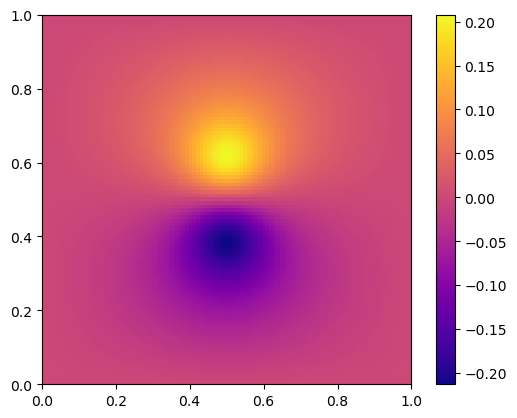

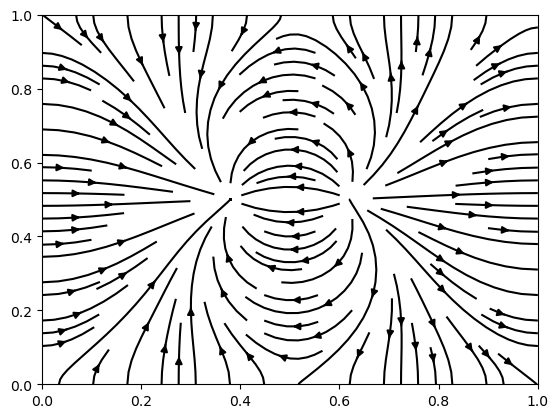

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.05): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE_CM(Etol=10**-6,N=100,w=1.75,max_iter=5000): #Œ≤ŒµŒªœÑŒπœÉœÑŒµœÇ œÄŒ±œÅŒ±ŒºŒµœÑœÅŒøŒπ Œù=100,ŒïœÑŒøŒª=10^-10
                                                   #ŒºŒ±œá_ŒπœÑŒµœÅ=5000,œâ=1.2-1.4
    sfalma=1
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #Œ±œÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # Œ∑ range ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒµŒπ ŒºŒøŒΩŒø ŒºŒµ Œ±Œ∫ŒµœÅŒ±ŒπŒµœÇ œÑŒπŒºŒµœÇ
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    X,Y=np.meshgrid(x,y)
    
    G1 = g2D(X, Y, 0.6, 0.5)
    G2 = g2D(X, Y, 0.4, 0.5)
    S = G1 - G2
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<max_iter:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                )

        E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
        E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
        Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)

        sfalma=np.abs(Etmp-E)
        E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi

    return (pfilist, E, ite)

diagdata=convE_CM()
plt.imshow(diagdata[0].T,cmap='plasma', origin = 'lower', extent = [0, 1, 0, 1])
plt.colorbar()
plt.show()
#den katalavainw ti paizei kai poly


Ey, Ex = np.gradient(-diagdata[0], h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')

If, instead of a dipole, try to solve the Poisson's equation with a single
charge (i.e., the system is not charge neutral) and periodic boundary
conditions. What do you observe? Can you explain?

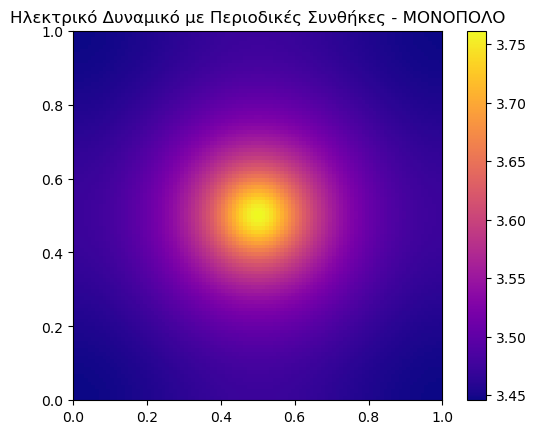

In [170]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # ŒúŒ≠Œ≥ŒµŒ∏ŒøœÇ œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ

def per(i, N):
    if i < 0:
        return i + N
    elif i >= N:
        return i - N
    else:
        return i

def convE_periodicMONOPOLO(Etol=1e-6, N=100, w=1.75, max_iter=10000):
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # ŒëœÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
    sfalma = 1

    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    pfilist = np.zeros((N, N))
    X, Y = np.meshgrid(x, y)

    S = g2D(X, Y, 0.5, 0.5)

    # ** ŒïœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫ŒÆ Œ¥ŒπŒ±Œ¥ŒπŒ∫Œ±œÉŒØŒ± Successive Over-Relaxation (SOR) **
    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(N):  
            for j in range(N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[per(i + 1, N), j] + pfilist[per(i - 1, N), j] +
                    pfilist[i, per(j + 1, N)] + pfilist[i, per(j - 1, N)] + h ** 2 * S[i, j]
                )

        # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑŒ∑œÇ ŒΩŒ≠Œ±œÇ œÑŒπŒºŒÆœÇ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ

    return pfilist, E, ite
diagdataperMONO = convE_periodicMONOPOLO()

# ** ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œÑŒøœÖ Œ¥œÖŒΩŒ±ŒºŒπŒ∫Œøœç **
plt.imshow(diagdataperMONO[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.title("ŒóŒªŒµŒ∫œÑœÅŒπŒ∫œå ŒîœÖŒΩŒ±ŒºŒπŒ∫œå ŒºŒµ Œ†ŒµœÅŒπŒøŒ¥ŒπŒ∫Œ≠œÇ Œ£œÖŒΩŒ∏ŒÆŒ∫ŒµœÇ - ŒúŒüŒùŒüŒ†ŒüŒõŒü")
plt.show()

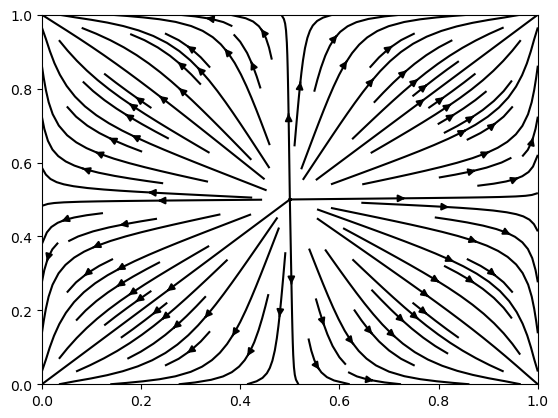

In [188]:

Ey, Ex = np.gradient(-diagdataperMONO[0], h)
plt.streamplot(np.linspace(0, 1, N), np.linspace(0, 1, N), Ex, Ey, color='black')

If we attempt to solve Poisson‚Äôs equation with a single point charge (i.e., a non-neutral system) while using periodic boundary conditions (PBC), we will observe unexpected and unphysical results.

üìå What Do We Observe?
üî¥ The solver struggles to converge

The potential will not stabilize properly.
üî¥ The potential is not physical

Because the single charge gets infinitely repeated across periodic boundaries, the system has infinite charge.
üî¥ The electric field does not behave normally

Instead of field lines spreading out as in free space, they wrap around the domain in an unphysical way.


- why is this considered abnormal?
- The electric field pattern in the image is abnormal because it is inconsistent with the expected behavior of a single isolated charge in free space. Here‚Äôs why:

üîπ Expected Behavior of a Single Charge
If you place a single charge in an open domain (non-periodic boundaries):

The electric field should radiate outward symmetrically (for a positive charge) or converge inward (for a negative charge).
The field lines should extend infinitely without looping back.
1Ô∏è‚É£ Periodic Boundary Conditions Create an Infinite Grid of Charges

In a periodic system, the single charge is repeated infinitely in all directions.
This means the system is not a single charge anymore but an infinite lattice of charges.
The field now behaves as if there are infinite positive charges periodically placed in the domain.
2Ô∏è‚É£ Formation of an Unphysical Dipole-like Structure

The field lines do not radiate outward from a single point.
Instead, they bend and meet at the center, resembling a dipole or quadrupole rather than a single monopole.
3Ô∏è‚É£ No Charge Neutrality ‚Üí Divergence Issues

Physically, periodic systems must be charge-neutral to have a well-defined solution.
Without a compensating background charge, the potential diverges, leading to an artificial distortion in the electric field.
4Ô∏è‚É£ Artificial Symmetry Due to Periodicity

The image shows an unexpected mirror symmetry along the centerlines.
This happens because the solver is effectively solving for multiple interacting charges rather than one.

Place the center of mass of the dipole at the center of the cell. Keeping the
center of mass fixed, change the distance between the two charges.
Calculate the energy vs the distance between the two charges (use
Dirichlet, Neumann, and periodic boundary conditions). Are the results you
get physically meaningful? Can you explain?

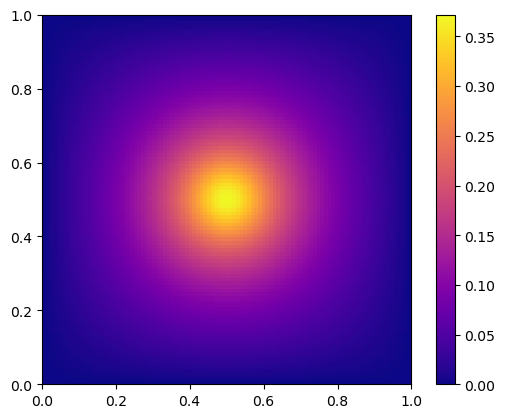

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100
h=(xmax-xmin)/(N-1)


def g2D(x,y,qx,qy,sigma=0.05): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convEM2(Etol=10**-6,N=100,w=1.75,max_iter=5000): #Œ≤ŒµŒªœÑŒπœÉœÑŒµœÇ œÄŒ±œÅŒ±ŒºŒµœÑœÅŒøŒπ Œù=100,ŒïœÑŒøŒª=10^-10
                                                   #ŒºŒ±œá_ŒπœÑŒµœÅ=5000,œâ=1.2-1.4
    sfalma=1
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #Œ±œÅœáŒπŒ∫ŒÆ œÑŒπŒºŒÆ ŒµŒΩŒ≠œÅŒ≥ŒµŒπŒ±œÇ
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # Œ∑ range ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒµŒπ ŒºŒøŒΩŒø ŒºŒµ Œ±Œ∫ŒµœÅŒ±ŒπŒµœÇ œÑŒπŒºŒµœÇ
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    X,Y=np.meshgrid(x,y)
    
    G = g2D(X, Y, 0.5, 0.5)
    S = G
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<max_iter:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                )

        E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
        E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
        Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)

        sfalma=np.abs(Etmp-E)
        E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi

    return (pfilist, E, ite)

diagdata22=convEM2()
plt.imshow(diagdata22[0].T,cmap='plasma', origin = 'lower', extent = [0, 1, 0, 1])
plt.colorbar()
plt.show()

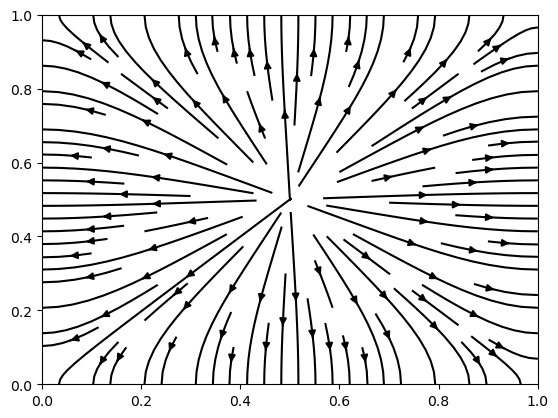

In [19]:
Ey, Ex = np.gradient(-diagdata22[0], h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')